# MNIST handwritten digits

Trying to classify handwritten digits using a neural network in pytorch.

Following the pytorch tutorials at https://pytorch.org/tutorials/beginner/basics/intro.html.

## Getting the data

In [1]:
# Packages and modules
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision

# Functions and classes
from torchvision.transforms import ToTensor, Lambda
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

In [2]:
# Download and/or load dataset (thanks Yann), and transform to tensors, and one-hot encodings
target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
train = MNIST(root="", transform=ToTensor(), target_transform=target_transform, download=True)
test = MNIST(root="", transform=ToTensor(), target_transform=target_transform, download=True)

In [3]:
# Make dataloader
train_loader = DataLoader(train)
test_loader = DataLoader(test)

In [4]:
# Load iterable
examples = enumerate(train_loader)

In [5]:
# Get first sample and check shape
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([1, 1, 28, 28])

In [6]:
example_targets.shape

torch.Size([1, 10])

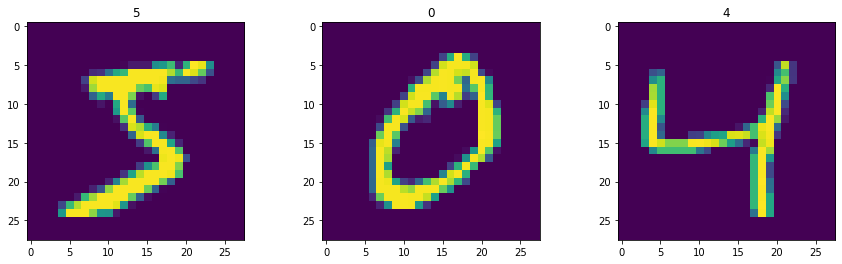

In [7]:
# Show first few sample inputs and labels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    ax = [ax1, ax2, ax3][i]
    ax.imshow(example_data[0][0])
    ax.set_title(f"{example_targets[0].argmax(0)}")
    batch_idx, (example_data, example_targets) = next(examples)
plt.show()

## Build neural network model

In [8]:
# Breakdown modelling functions
X = torch.rand(1, 28, 28)
print(f"Input: {X.shape}")

X_flat = nn.Flatten()(X)
print(f"Flattened: {X_flat.shape}")

X_l = nn.Linear(28*28, 4)(X_flat)
print(f"Linear: {X_l}")

X_r = nn.ReLU()(X_l)
print(f"ReLU: {X_r}")

logits = nn.Linear(4, 4)(X_r)
print(f"Model: {logits}")

pred_probab = nn.Softmax(dim=1)(logits)
print(f"Probabilities: {pred_probab}")

print(f"Predicted class: {pred_probab.argmax(1)}")

Input: torch.Size([1, 28, 28])
Flattened: torch.Size([1, 784])
Linear: tensor([[-0.1867,  0.0457, -0.2137,  0.3826]], grad_fn=<AddmmBackward0>)
ReLU: tensor([[0.0000, 0.0457, 0.0000, 0.3826]], grad_fn=<ReluBackward0>)
Model: tensor([[-0.2818, -0.0155, -0.1354,  0.0503]], grad_fn=<AddmmBackward0>)
Probabilities: tensor([[0.2059, 0.2687, 0.2384, 0.2870]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([3])


In [29]:
# Create a neural network
seq_modules = nn.Sequential(
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10),
)
seq_modules(X_flat)

tensor([[ 0.0650,  0.0377, -0.0302,  0.0017, -0.0456, -0.0076,  0.0098,  0.0365,
         -0.0433,  0.0120]], grad_fn=<AddmmBackward0>)

In [17]:
# Create neural network model class
class NeuralNetwork(nn.Module):
    def __init__(self, seq_modules):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = seq_modules

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [27]:
# Create neural network model
model = NeuralNetwork(seq_modules)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [46]:
name, param = next(model.named_parameters())
print(f"Layer: {name}")
print(f"Size: {param.size()}")
print(f"Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight
Size: torch.Size([512, 784])
Values : tensor([[-0.0010,  0.0225,  0.0028,  ...,  0.0031, -0.0181,  0.0208],
        [ 0.0055,  0.0096, -0.0172,  ...,  0.0155, -0.0319,  0.0193]],
       grad_fn=<SliceBackward0>) 



In [31]:
# Use model to get predictions
model(X)

tensor([[-0.0964,  0.0403, -0.0627, -0.0633,  0.0871, -0.0381, -0.0152, -0.0051,
          0.0379, -0.0017]], grad_fn=<AddmmBackward0>)

In [18]:
# Set device to GPU or CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [19]:
# Create neural network model
model = NeuralNetwork(seq_modules).to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [16]:
# Use model to get predictions
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(f"Model: {logits}")



Model: tensor([[-0.0801,  0.0466,  0.0069, -0.0498,  0.0910,  0.0027, -0.0092,  0.0093,
          0.0692,  0.0512]], device='cuda:0', grad_fn=<AddmmBackward0>)
